In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data_path = Path('./data')
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


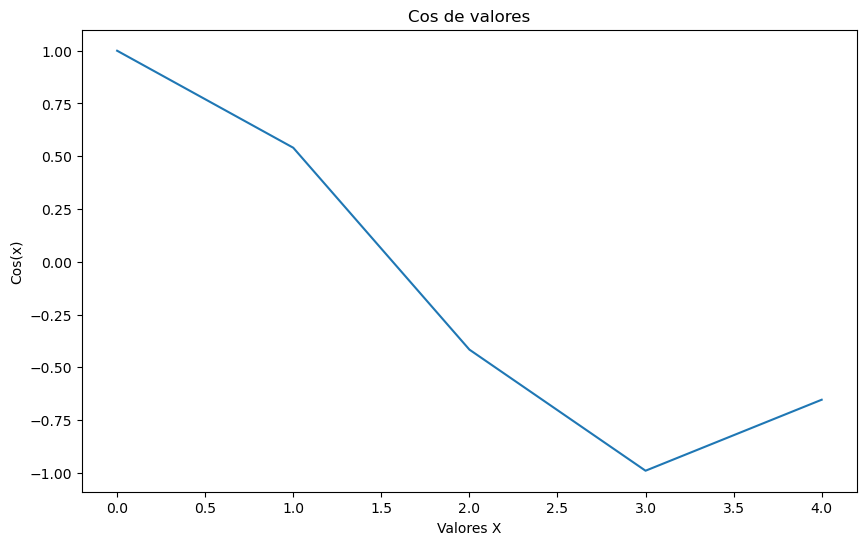

In [3]:
fig, ax = plt.subplots(figsize = (10, 6))

x = np.arange(5)
y = np.cos(x)

ax.plot(x, y)
ax.set(xlabel = 'Valores X', ylabel = 'Cos(x)', title = 'Cos de valores');

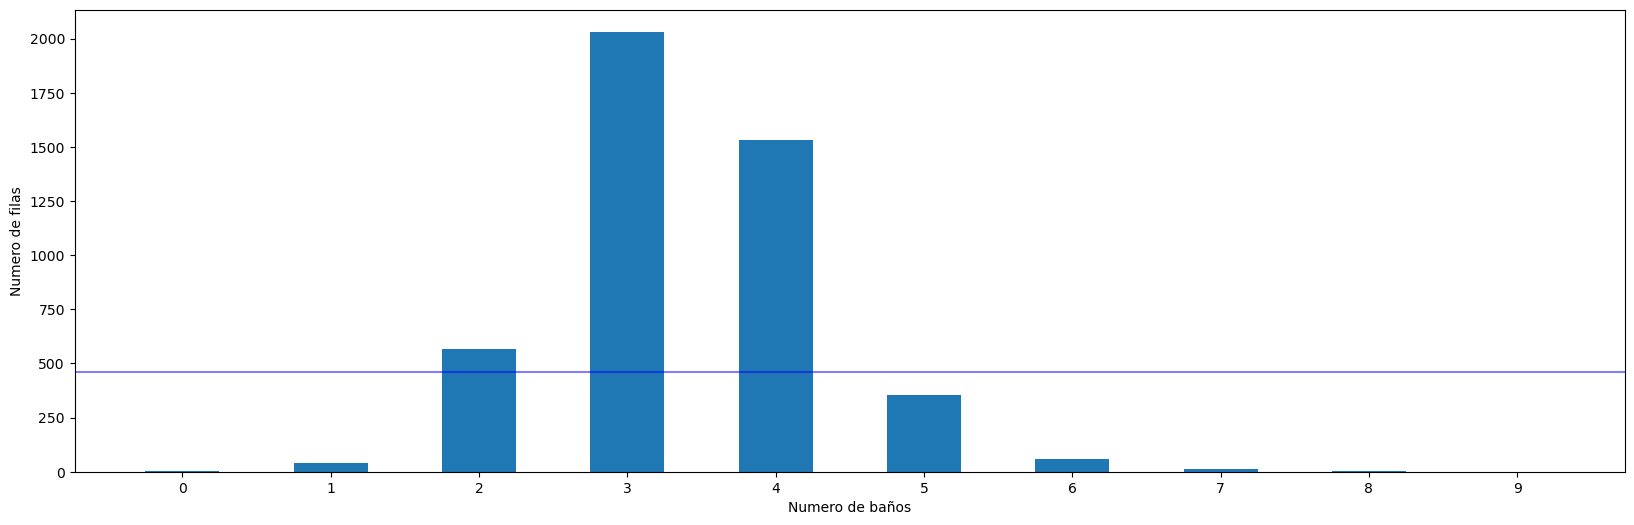

In [4]:
num_by_bathrooms = data.groupby('bedrooms')['price'].count()
num_by_bathrooms
fig, ax = plt.subplots(figsize = (20, 6))

ax.bar(x = num_by_bathrooms.index.values, height=num_by_bathrooms.values, width = 0.5, align='center')
ax.axhline(num_by_bathrooms.mean(), color = 'blue', alpha = .5)

ax.set_xticks(num_by_bathrooms.index.values)
ax.set_yscale('linear') # log

ax.set_xlabel('Numero de baños')
ax.set_ylabel('Numero de filas');

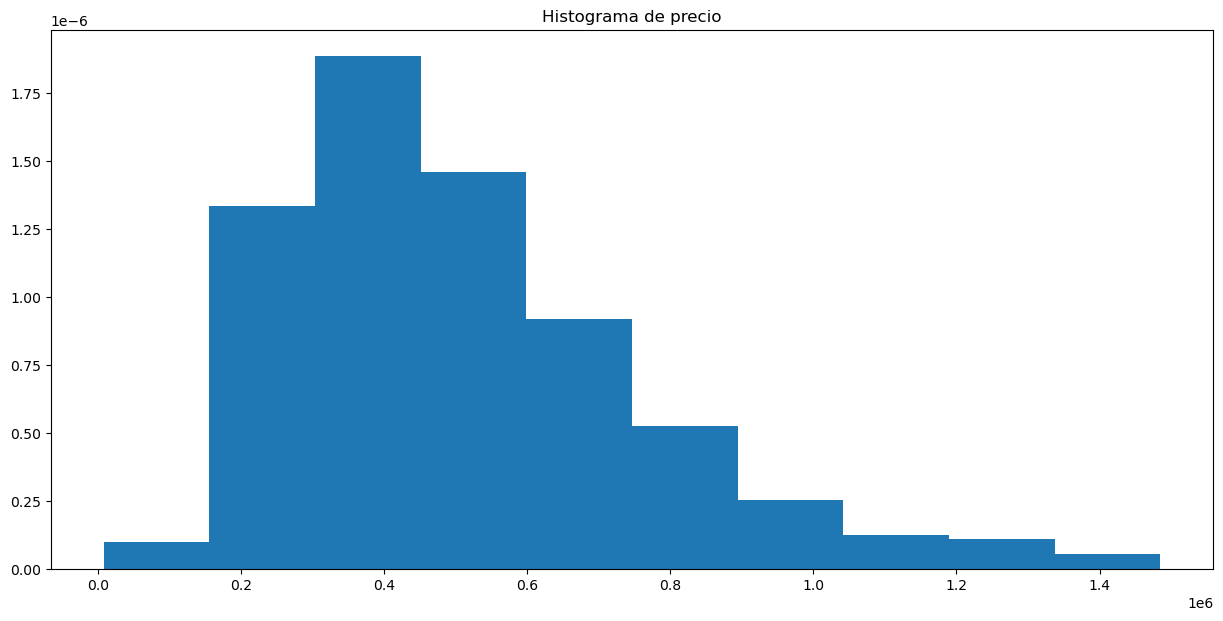

In [5]:
price = data.query('price > 0 and price < 1_500_000')['price']

fig, ax = plt.subplots(figsize = (15, 7))
ax.set_yscale('linear')
ax.hist(price, bins=10, density=True)
ax.set_title('Histograma de precio');

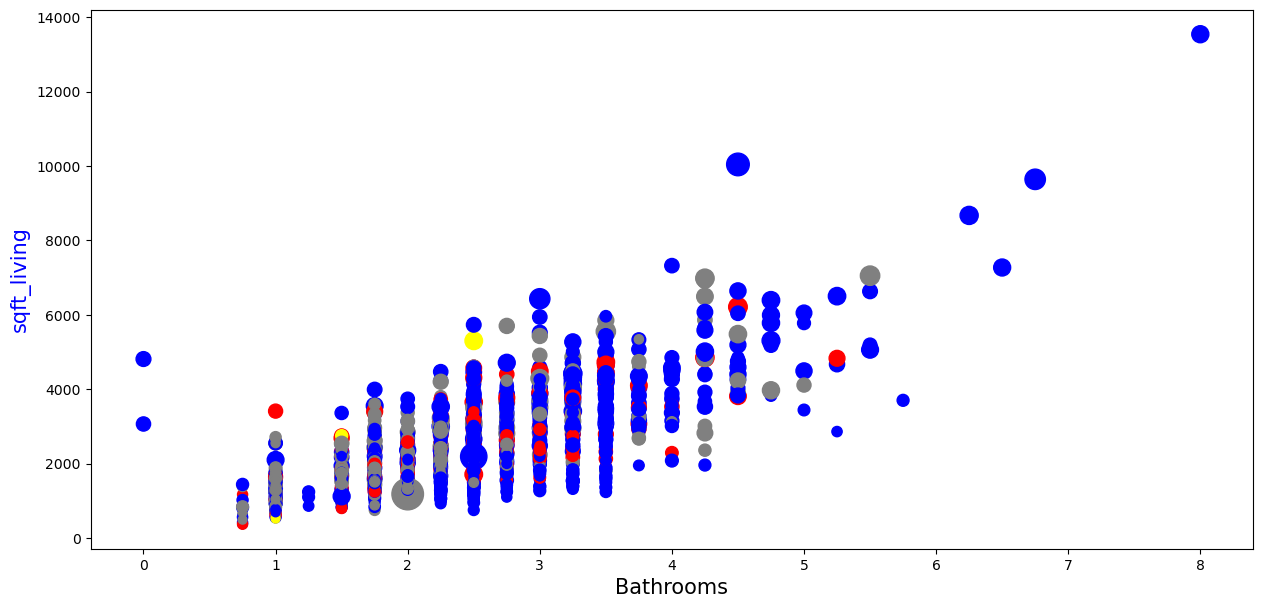

In [6]:
fig, ax = plt.subplots(figsize = (15, 7))

x = data['bathrooms']
y = data['sqft_living']

vol = np.sqrt(data['price'])/10

colors = ["", "green", "yellow", "blue", "gray", "red"]

ax.scatter(x = x, y = y, s = vol, c = data['condition'].apply(lambda x: colors[x]))

ax.set_xlabel('Bathrooms', fontsize = 15)
ax.set_ylabel('sqft_living', c = 'blue', fontsize = 15);

In [8]:
cities = data.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')
vc = cities['city'].value_counts()
vc

Seattle     1573
Renton       293
Bellevue     286
Redmond      235
Issaquah     187
Name: city, dtype: int64

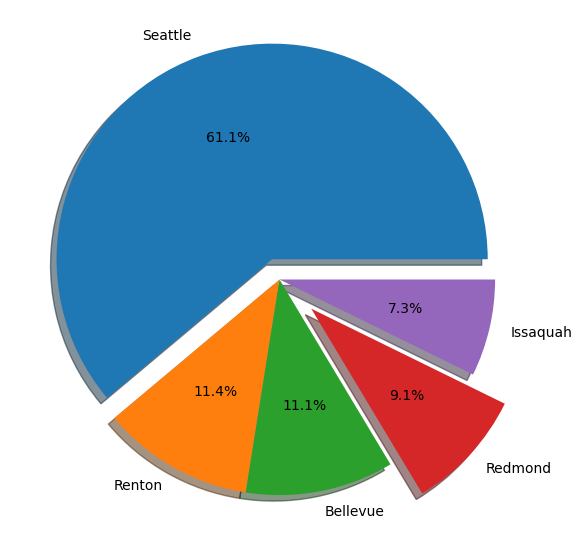

In [14]:
fig, ax = plt.subplots(figsize = (15, 7))

explode = [0.1, 0, 0, 0.2, 0]
ax.pie(vc, labels=vc.index, explode=explode, shadow = True, autopct='%1.1f%%', startangle=0, );

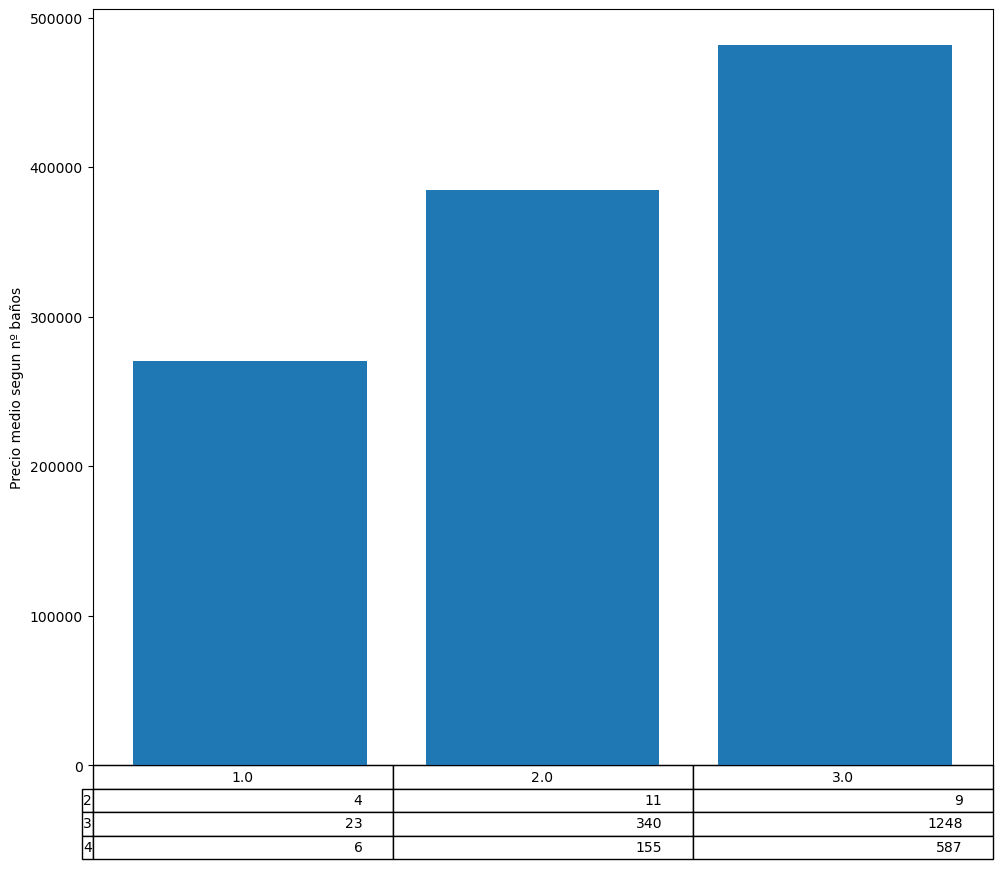

In [15]:
df = data.query('condition in (2,3,4) and bedrooms in (1,2,3)')
_ = df.pivot_table(index = 'condition', columns = 'bedrooms', values = 'price', aggfunc=np.count_nonzero)
price_mean = df.groupby('bedrooms')['price'].mean()
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(x = price_mean.index, height=price_mean.values)
ax.table(_.values, loc='bottom', rowLabels=_.index.values, colLabels=_.columns.values)

plt.subplots_adjust(left=0, bottom=-.2)
plt.xticks([])

plt.ylabel('Precio medio segun nº baños');

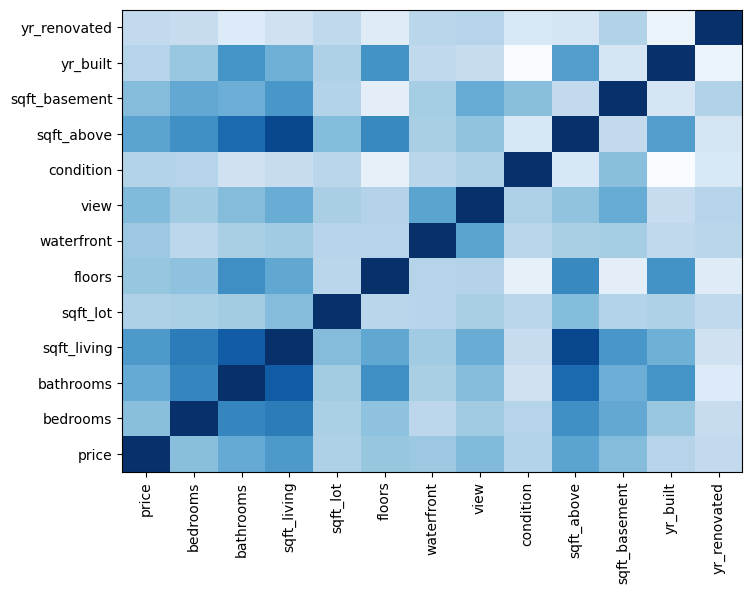

In [17]:
fig, ax = plt.subplots(figsize = (8,6))

ax.pcolormesh(np.arange(13), np.arange(13), data.corr().values, cmap = 'Blues')

plt.xticks(np.arange(13), data.corr().columns, rotation = 'vertical');
plt.yticks(np.arange(13), data.corr().columns, rotation = 'horizontal');

In [22]:
from mpl_toolkits.mplot3d import Axes3D

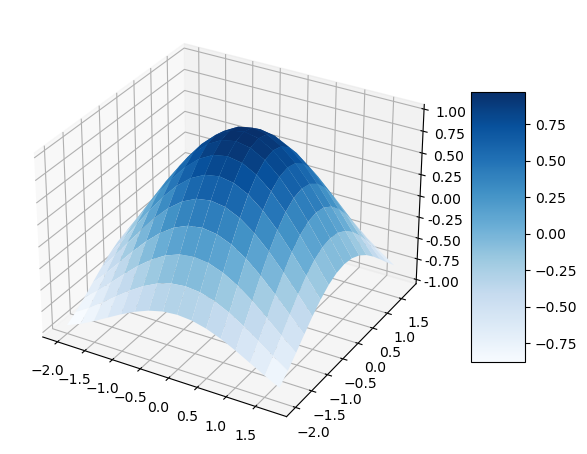

In [35]:
fig, ax = plt.subplots(figsize = (7,7),subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='Blues',
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()